<div class="alert alert-block alert-success">
    
 # Berkeley- PCMLAI: Module 1
    
 👨‍🏫 **Vikesh K**      
  #️⃣ **OH-1**
  
  

</div>

# Case Study: Prioritise Product Development work

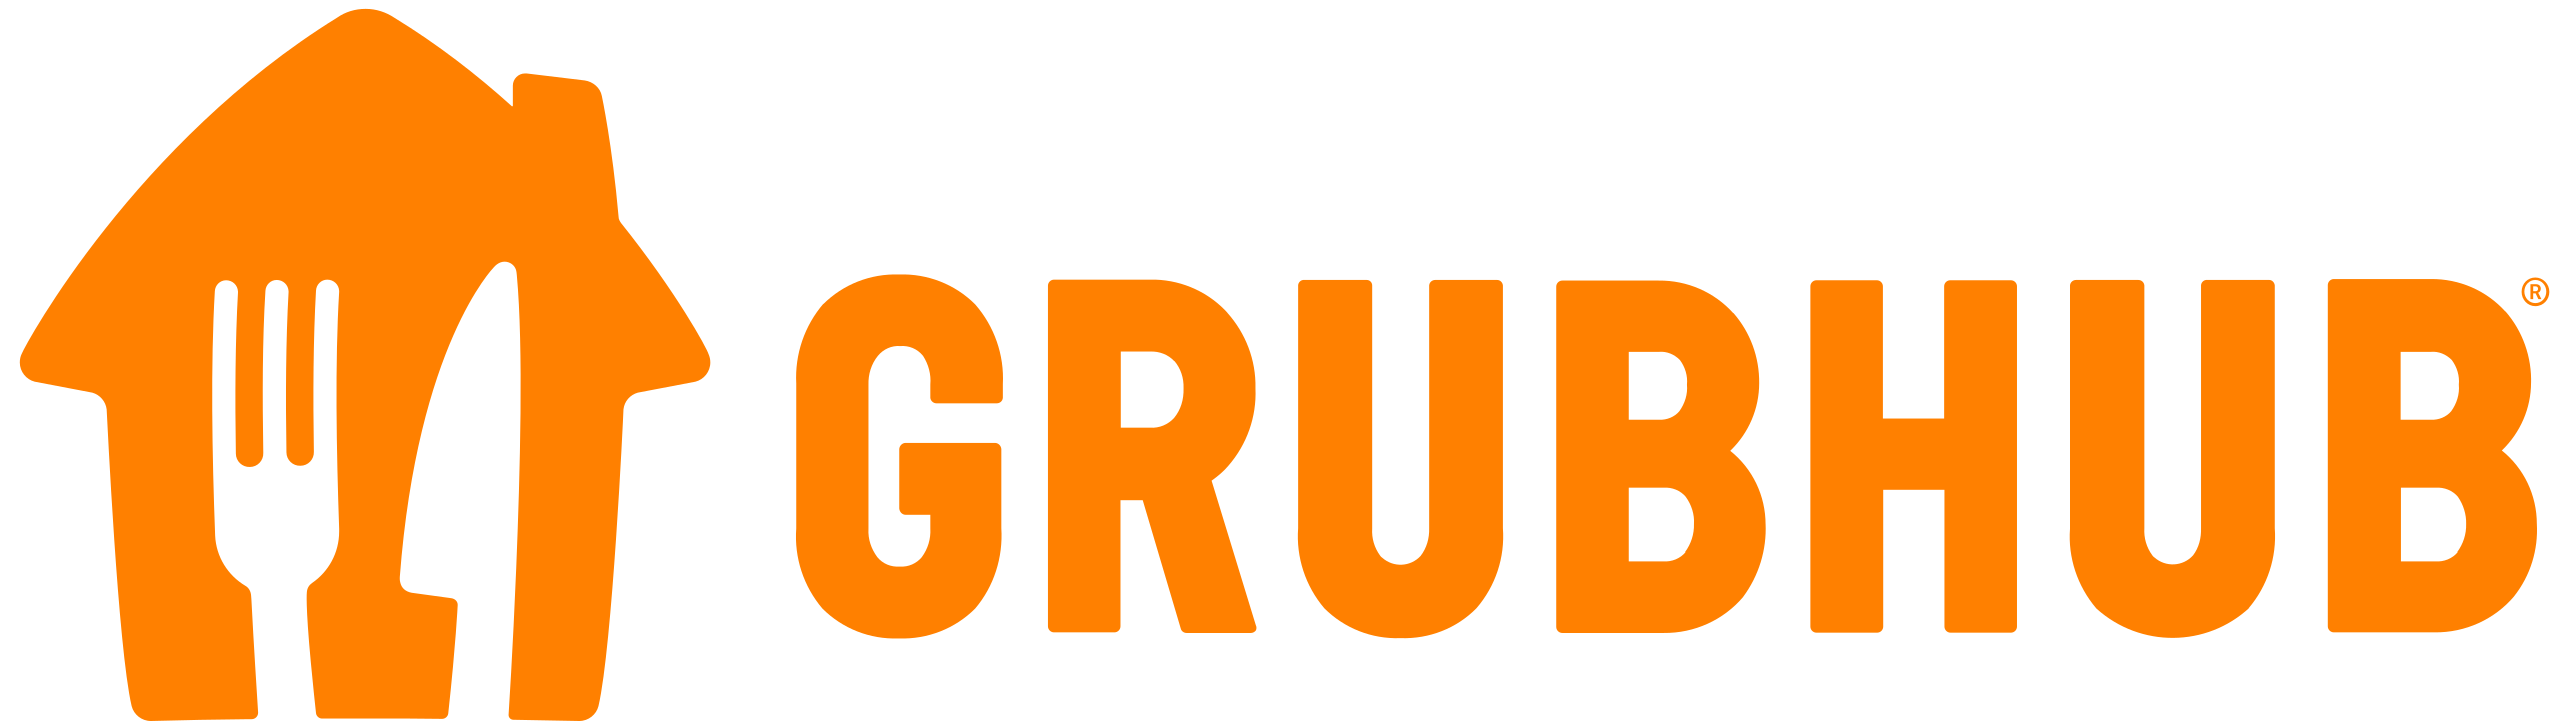


Given the below data which state should we focus our only available product development team on? 

Respond with your answer and reasoning. Where you don't have enough data to make a decision, make assumptions and list
them in your response.

**Data Dictionary**

- `total_orders`: online food orders placed on grubhub.com
- `visits`:  the number of unique times people have gone to grubhub.com
- `revenue`: the amount of money we are making

**Company Details**

Grubhub is a part of Just Eat Takeaway.com, a leading global online food delivery marketplace, and features more than 365,000 restaurant partners in over 4,000 U.S. cities.

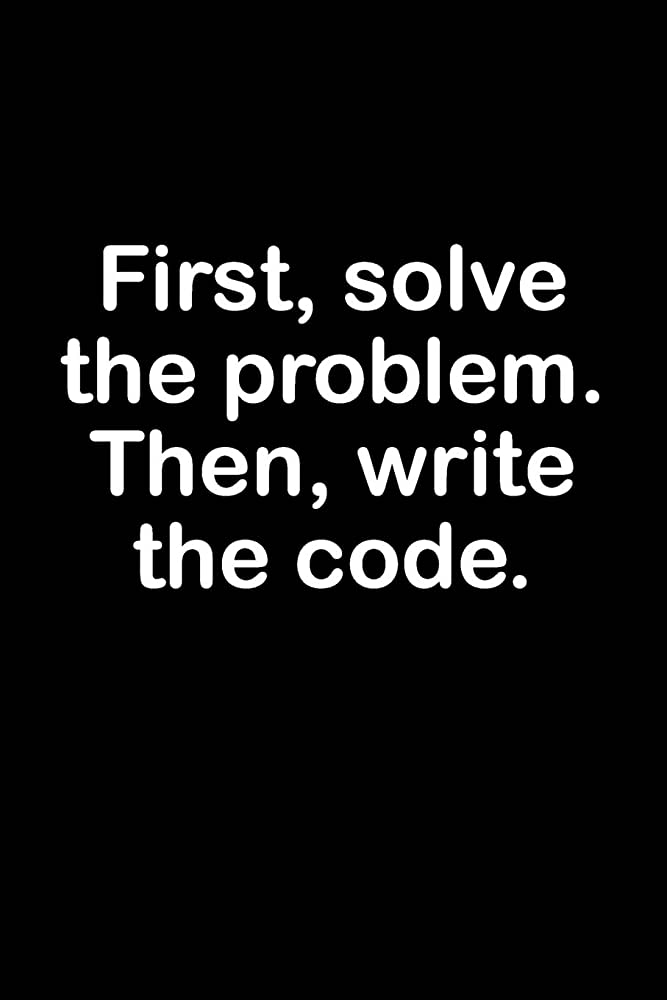

# Loading the Data Set 


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [24]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/online_orders.csv'
df = pd.read_csv(url, parse_dates= ['date'])

In [27]:
df.head()

,date,state,total_orders,revenue,visits
0,2014-01-01,CA,411,10369.53,17633
1,2014-01-02,CA,347,8754.81,15949
2,2014-01-03,CA,522,13170.06,11731
3,2014-01-04,CA,635,16021.05,16728
4,2014-01-05,CA,214,5399.22,12570


In [29]:
df.sample(10)

,date,state,total_orders,revenue,visits
467,2014-04-16,NYC,6573,871711.26,98392
120,2014-05-01,CA,455,11479.65,15093
675,2014-05-13,IA,38918,13217331.16,2598869
343,2014-06-12,IL,3890,86007.90,36380
283,2014-04-13,IL,13407,296428.77,135494
163,2014-06-13,CA,334,8426.82,12790
32,2014-02-02,CA,512,12917.76,14699
61,2014-03-03,CA,753,18998.19,26261
416,2014-02-24,NYC,18358,1498379.96,333099
130,2014-05-11,CA,363,9158.49,17849


## Learner Hypothesis

**What should we check in the data**

* Duplicates
* Missing values
* Column Types- Maybe change it 
* Shape of the data 
* Overall size
* Negative revenue


**How to develop a high level understanding of the data**

* descibe()
* Date range
* Total Revenue
* Total visits
* Total Orders
    * State level 
* AOV, AVV


**How would you drill down into the details**

* What questions would you like to answer?
* How would you approach it numerically and graphically?

* State with high visits and low revenue
* Revenue, Visits, Orders trend 
* Peak and non-peak of the data 
* Seasonality

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          724 non-null    datetime64[ns]
 1   state         724 non-null    object        
 2   total_orders  724 non-null    int64         
 3   revenue       724 non-null    float64       
 4   visits        724 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 28.4+ KB


In [12]:
df.isna().sum()

date            0
state           0
total_orders    0
revenue         0
visits          0
dtype: int64

In [ ]:
df.isna().sum()

In [14]:
df.isna().mean()

date           0.00
state          0.00
total_orders   0.00
revenue        0.00
visits         0.00
dtype: float64

In [13]:
df.isnull().sum()

date            0
state           0
total_orders    0
revenue         0
visits          0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [23]:
df.query("revenue < 0")

,date,state,total_orders,revenue,visits


## High level understanding 

In [28]:
df.describe()

,date,total_orders,revenue,visits
count,724,724.00,724.00,724.00
mean,2014-04-01 00:00:00,13369.91,2501466.84,787544.31
min,2014-01-01 00:00:00,164.00,4137.72,4156.00
25%,2014-02-15 00:00:00,1372.25,31095.49,36552.50
50%,2014-04-01 00:00:00,12710.00,433479.68,156642.00
75%,2014-05-16 00:00:00,20807.75,4200262.56,846030.25
max,2014-06-30 00:00:00,44035.00,16056648.30,6868946.00
std,NaN,10530.68,3486169.20,1270341.97


In [35]:
df.describe(include = "object")

,state
count,724
unique,4
top,CA
freq,181


In [39]:
df["state"].value_counts()

state
CA     181
IL     181
NYC    181
IA     181
Name: count, dtype: int64

In [34]:
# df['total_orders'].plot(kind = "kde")

In [44]:
df.groupby("state").describe().T

state                                CA                   IA  \
date         count                  181                  181   
             mean   2014-04-01 00:00:00  2014-04-01 00:00:00   
             min    2014-01-01 00:00:00  2014-01-01 00:00:00   
             25%    2014-02-15 00:00:00  2014-02-15 00:00:00   
             50%    2014-04-01 00:00:00  2014-04-01 00:00:00   
             75%    2014-05-16 00:00:00  2014-05-16 00:00:00   
             max    2014-06-30 00:00:00  2014-06-30 00:00:00   
             std                    NaN                  NaN   
total_orders count               181.00               181.00   
             mean                568.10             25481.33   
             min                 164.00              3254.00   
             25%                 441.00             19884.00   
             50%                 574.00             26080.00   
             75%                 700.00             30204.00   
             max                 968.00             44035.00   
             std                 175.90              7522.04   
revenue      count               181.00               181.00   
             mean              14333.15           7672617.57   
             min                4137.72            721151.48   
             25%               11126.43           5716969.92   
             50%               14482.02           7448461.74   
             75%               17661.00           9521290.74   
             max               24422.64          16056648.30   
             std                4438.03           2888023.31   
visits       count               181.00               181.00   
             mean              19908.39           2704941.31   
             min                4156.00            224163.00   
             25%               14349.00           1924693.00   
             50%               18568.00           2577243.00   
             75%               23278.00           3240419.00   
             max               67643.00           6868946.00   
             std                8759.93           1206855.15   

state                                IL                  NYC  
date         count                  181                  181  
             mean   2014-04-01 00:00:00  2014-04-01 00:00:00  
             min    2014-01-01 00:00:00  2014-01-01 00:00:00  
             25%    2014-02-15 00:00:00  2014-02-15 00:00:00  
             50%    2014-04-01 00:00:00  2014-04-01 00:00:00  
             75%    2014-05-16 00:00:00  2014-05-16 00:00:00  
             max    2014-06-30 00:00:00  2014-06-30 00:00:00  
             std                    NaN                  NaN  
total_orders count               181.00               181.00  
             mean              11095.65             16334.57  
             min                1507.00              4300.00  
             25%                7281.00             12073.00  
             50%               10198.00             16435.00  
             75%               14594.00             20116.00  
             max               26249.00             34801.00  
             std                5192.89              5959.35  
revenue      count               181.00               181.00  
             mean             245324.74           2073591.88  
             min               33319.77            161336.78  
             25%              160982.91            915903.56  
             50%              225477.78           1664845.54  
             75%              322673.34           2879696.52  
             max              580365.39           6529363.62  
             std              114814.76           1431806.10  
visits       count               181.00               181.00  
             mean             118488.59            306838.94  
             min               12751.00             72363.00  
             25%               74832.00            165728.00  
             50%              103497.00            263379.00